In [1]:
#          #####################################################################################
#          #                                 IN THE NAME OF ALLAH                              #
#          #             PROGRESSIVE COLLAPSE ANALYSIS OF CONCRETE 2-STORY FRAME               #
#          #-----------------------------------------------------------------------------------#
#          #              THIS PROGRAM WRITTEN BY SALAR DELAVAR GHASHGHAEI (QASHQAI)           #
#          #                       EMAIL: salar.d.ghashghaei@gmail.com                         #
#          #####################################################################################

In [2]:
"""
Progressive collapse of reinforced concrete frames occurs when a local failure—due to accidental
 actions such as impact, explosion or fire—triggers a chain reaction of element removals, leading
 to partial or total structural loss. Advanced assessment hinges on capturing nonlinear material
 behavior, geometric effects, and load‐redistribution mechanisms that dictate whether alternative
 load paths can sustain the imposed demands.

1. Modeling Philosophy

- Fiber‐based sections discretize concrete and steel across the cross-section, enabling accurate
 stress–strain representation under combined axial, bending and shear demands. Cover, core concrete,
 and rebar layouts are modeled with uniaxial constitutive laws that include confinement, cracking,
 strain hardening and ultimate strain limits.
- Nonlinear beam–column elements employ Gauss integration points along member length, paired with
 corotational kinematics to account for large displacements and P-Δ effects in a fully consistent 2D formulation.

2. Analysis Strategy

- Alternate load‐path method: deliberately remove one or more columns (or beams) after applying
 gravity loads, then trace the static response under incremental displacement control at a critical
 location. The structural response captures bending yielding, shear failure, catenary action and
 eventual loss of load‐bearing capacity.
- Pushover framework: displacement control at a predefined “attack” node (e.g., mid-height of a key column)
 simulates the increasing drift demands after element removal. Reaction forces at the base yield
 a capacity curve relating force vs. displacement, from which reserve strength and ductility can be assessed.

3. Key Response Mechanisms

- Flexural yielding and plastic hinge formation in adjacent beams and columns allow moment redistribution.
 Hinge rotation capacity depends on reinforcement ratio, concrete confinement and strain‐hardening characteristics of steel.
- P-Δ instability magnifies demands when large drifts develop; corotational transforms ensure equilibrium
 accounts for geometric nonlinearity.
- Catenary action engages once flexural capacity is exhausted and members deform significantly, mobilizing
 tensile forces in reinforcement. Accurate modeling of ultimate tendon strain (eult) is critical to predict post-peak response.
- Shear failure remains brittle; its prevention through detailing (stirrups, confinement) is vital to allow
 ductile mechanisms to develop.

4. Collapse Criteria and Robustness

- Vertical and lateral drift limits define collapse thresholds. Exceeding the ultimate drift at a control
 node triggers element deletion, simulating fracture or buckling.
- Progressive removal tests on different locations probe system robustness, verifying that the structure
 retains sufficient redundancy and alternative load paths.

5. Practical Implications

- Design against progressive collapse requires enforcing continuity (tie forces), detailing for ductility
 (strong-column–weak-beam hierarchy), and redundancy (multiple load paths).
- Nonlinear analyses—both static pushover and dynamic removal simulations—inform code provisions
 (e.g., UFC 4-023-03, GSA Guidelines) by quantifying reserve strength margins and post-failure behavior.

In workflow, the combination of fiber section definitions, corotational beam–column elements,
 displacement-controlled pushover and element removal routines captures the critical phases of
 progressive collapse: initial yielding, redistribution, catenary action and final instability.
 Interpreting capacity curves and post-peak degradation provides insights on member detailing and
 overall frame robustness under accidental collapse scenarios.

"""

'\nProgressive collapse of reinforced concrete frames occurs when a local failure—due to accidental\n actions such as impact, explosion or fire—triggers a chain reaction of element removals, leading\n to partial or total structural loss. Advanced assessment hinges on capturing nonlinear material\n behavior, geometric effects, and load‐redistribution mechanisms that dictate whether alternative\n load paths can sustain the imposed demands.\n\n1. Modeling Philosophy\n\n- Fiber‐based sections discretize concrete and steel across the cross-section, enabling accurate\n stress–strain representation under combined axial, bending and shear demands. Cover, core concrete,\n and rebar layouts are modeled with uniaxial constitutive laws that include confinement, cracking,\n strain hardening and ultimate strain limits.\n- Nonlinear beam–column elements employ Gauss integration points along member length, paired with\n corotational kinematics to account for large displacements and P-Δ effects in a fu

In [3]:
# wikipedia: Progressive collapse
'https://en.wikipedia.org/wiki/Progressive_collapse'
# REPORT: Computational Modeling of Progressive Collapse in Reinforced Concrete Frame Structures
'https://peer.berkeley.edu/sites/default/files/webpeer710_mohamed_m._talaat_khalid_m._mosalam.pdf'
# PAPER: The Performance of Resistance Progressive Collapse Analysis for High-Rise Frame-Shear Structure Based on OpenSees
'https://onlinelibrary.wiley.com/doi/10.1155/2017/3518232'
# PAPER: Benchmark Numerical Model for Progressive Collapse Analysis of RC Beam-Column Sub-Assemblages
'https://www.mdpi.com/2075-5309/12/2/122?type=check_update&version=1'
# PAPER: A computationally efficient numerical model for progressive collapse analysis of reinforced concrete structures
'https://journals.sagepub.com/doi/10.1177/2041419619854768?icid=int.sj-full-text.similar-articles.2'
# PAPER: The Performance of Resistance Progressive Collapse Analysis for High-Rise Frame-Shear Structure Based on OpenSees
'https://onlinelibrary.wiley.com/doi/10.1155/2017/3518232'
# PAPER: Refined dynamic progressive collapse analysis of RC structures
'https://www.researchgate.net/publication/321948788_Refined_dynamic_progressive_collapse_analysis_of_RC_structures'

'https://www.researchgate.net/publication/321948788_Refined_dynamic_progressive_collapse_analysis_of_RC_structures'

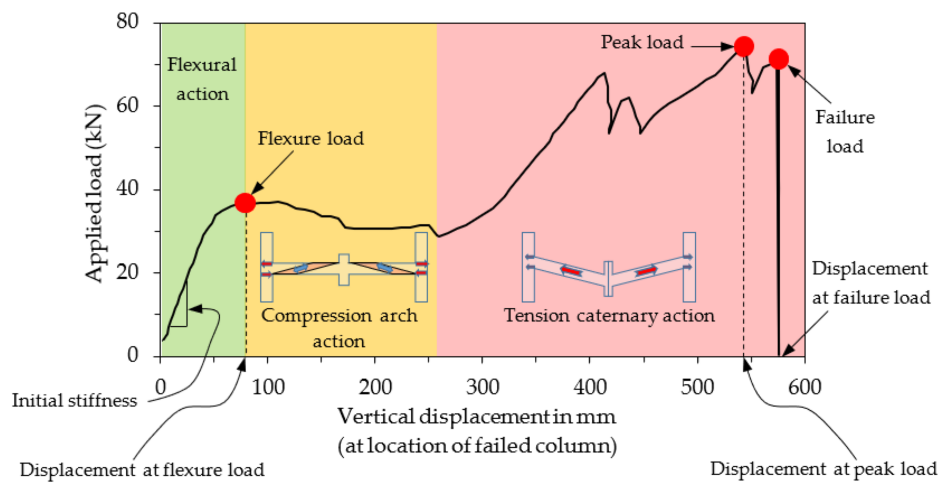

In [4]:
# Load the image
def PLOT_IMAGE(image):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    image = mpimg.imread(image_path)

    # Display the image
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
    
image_path = 'OPENSEES_PROGRESSIVE_COLLAPSE.png'    
PLOT_IMAGE(image_path)

In [5]:
def CURRENT_TIME():
    import time
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    print(f"Current time (HH:MM:SS): {current_time}\n\n")
    
# ---------------------
"""
When OK equals -1, it generally indicates that the command or operation was not executed
because it was already in progress or had already been completed. This can happen if you
try to run a command that is already running or has been completed in a previous step.

When OK equals -2, it typically indicates that the command or operation was not executed
because it was not recognized or not implemented. This could mean that the command
is either misspelled, not available in the current version of OpenSees, or not applicable to the current context.

When OK equals -3, it typically means that the command or operation failed.
This could be due to various reasons, such as incorrect input parameters,
syntax errors, or issues with the model setup.
"""
def ANALYSIS(OK, INCREMENT, TOLERANCE, MAX_ITERAIONS):
    import openseespy.opensees as op
    test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 4: 'RelativeNormUnbalance',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 4: 'RaphsonNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}

    for i in test:
        for j in algorithm:
            if OK != 0:
                if j < 4:
                    op.algorithm(algorithm[j], '-initial')

                else:
                    op.algorithm(algorithm[j])

                op.test(test[i], TOLERANCE, MAX_ITERAIONS) 
                OK = op.analyze(INCREMENT)                            
                print(test[i], algorithm[j], OK)             
                if OK == 0:
                    break
            else:
                continue

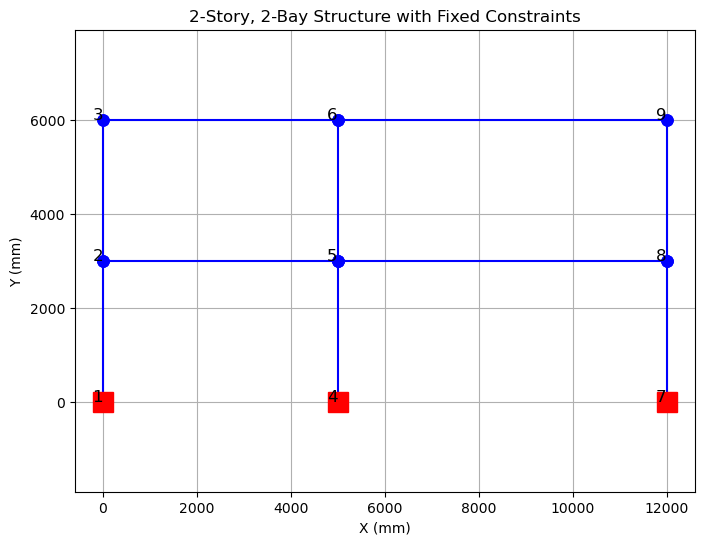

In [6]:
import matplotlib.pyplot as plt

# Define node coordinates (in mm)
H1 = 3000 # [mm] 1st floor length
H2 = 3000 # [mm] 2nd floor length
L1 = 5000 # [mm] 1st bay length
L2 = 7000 # [mm] 2nd bay length

# Node coordinates (in mm)
node_coords = [
    (0, 0), (0, H1), (0, H1+H2),  # Left column (base, 1st floor, 2nd floor)
    (L1, 0), (L1, H1), (L1, H1+H2),  # Middle column (base, 1st floor, 2nd floor)
    (L1+L2, 0), (L1+L2, H1), (L1+L2, H1+H2)  # Right column (base, 1st floor, 2nd floor)
]

# Define nonlinear beam-column elements for columns and beams
elementsZ = [
    (0, 1), (1, 2),  # Left column
    (3, 4), (4, 5),  # Middle column
    (6, 7), (7, 8),  # Right column
    (1, 4), (4, 7),  # Bottom beam
    (2, 5), (5, 8)   # Top beam
]

# Define fixed nodes (base nodes)
fixed_nodes = [0, 3, 6]

# Extract node coordinates
x_coords, y_coords = zip(*node_coords)

# Plot the 2-story, 2-bay structure
plt.figure(figsize=(8, 6))
for element in elementsZ:
    x_vals = [x_coords[element[0]], x_coords[element[1]]]
    y_vals = [y_coords[element[0]], y_coords[element[1]]]
    plt.plot(x_vals, y_vals, 'b-o', markersize=8)

# Annotate node numbers
for i, (x, y) in enumerate(node_coords):
    plt.text(x, y, f'{i+1}', fontsize=12, ha='right')

# Plot red rectangles to show fixed constraints
for node in fixed_nodes:
    plt.plot(x_coords[node], y_coords[node], 's', color='red', markersize=15)

plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('2-Story, 2-Bay Structure with Fixed Constraints')
plt.grid(True)
plt.axis('equal')
plt.show()


In [7]:
def CONCRETE_SECTION_PLOT(Bcol, Hcol, Bbeam, Hbeam, cover, Rebabr_D, nFibCoverZ, nFibCoverY, nFibCoreZ, nFibCoreY, PLOT):
    import matplotlib.pyplot as plt
    import numpy as np
    import openseespy.opensees as ops
    import opsvis as opsv
    
    Mat_Tag01 = 1 # Confined Concrete Section Tag
    Mat_Tag02 = 2 # Unconfined Concrete Section Tag
    Mat_Tag03 = 3 # Steel Rebar Section Tag
    SECTION_TAG_01 = 1 # Concrete Column Section Tag
    SECTION_TAG_02 = 2 # Concrete Beam Section Tag
    
    fc = -35 # [N/mm^2] Nominal concrete compressive strength
    Ec = 4700 * np.sqrt(-fc) # [N/mm^2] Concrete Elastic Modulus (the term in sqr root needs to be in psi

    # confined concrete
    Kfc = 1.3;			# ratio of confined to unconfined concrete strength - COLUMN
    fc1C = Kfc*fc;		# CONFINED concrete (mander model), maximum stress - COLUMN
    eps1C = 2*fc1C/Ec;	# strain at maximum stress 
    fc2C = 0.2*fc1C;		# ultimate stress
    eps2C = 5*eps1C;		# strain at ultimate stress 
    # unconfined concrete
    fc1U = fc;			# UNCONFINED concrete (todeschini parabolic model), maximum stress
    eps1U = -0.0025;			# strain at maximum strength of unconfined concrete
    fc2U = 0.2*fc1U;		# ultimate stress
    eps2U = -0.012;			# strain at ultimate stress
    Lambda = 0.1;				# ratio between unloading slope at $eps2 and initial slope $Ec
    # tensile-strength properties
    ftC = -0.55*fc1C;		# tensile strength +tension
    ftU = -0.55*fc1U;		# tensile strength +tension
    Ets = ftU/0.002;		# tension softening stiffness
    ops.uniaxialMaterial('Concrete02', Mat_Tag01, fc1C, eps1C, fc2C, eps2C, Lambda, ftC, Ets) # build core concrete (confined)
    ops.uniaxialMaterial('Concrete02', Mat_Tag02, fc1U, eps1U, fc2U, eps2U, Lambda, ftU, Ets) # build cover concrete (unconfined)
    # REBAR MATERIAL PROPERTIES:
    Fy = 4000			    # Steel rebar yield stress
    ey = 0.02			    # Steel rebar yield strain
    Es = Fy/ey				# modulus of steel			
    Fu = 1.1818*Fy          # [N/mm²] Steel Ultimate Strength
    esu = ey*75.2           # [mm/mm] Steel Ultimate Strain
    Esh = (Fu - Fy)/(esu - ey)
    Bs = Esh / Es           # strain-hardening ratio 
    R0 = 18.0				# control the transition from elastic to plastic branches
    cR1 = 0.925				# control the transition from elastic to plastic branches
    cR2 = 0.15				# control the transition from elastic to plastic branches
    #ops.uniaxialMaterial('Steel02', Mat_Tag03, Fy, Es, Bs, R0, cR1, cR2) # build reinforcement material  
    """
    E_steel = 210e3               # [N/mm²] Young's modulus
    fy_steel = 4000               # [N/mm²] Yield strength
    fu_steel = 1.23 * fy_steel    # [N/mm²] Ultimate strength
    esh = 0.02                    # Strain corresponding to initial strain hardening
    eult = 0.191                  # Strain at peak stress
    Esh = (fu_steel - fy_steel)/(eult - esh)
    ops.uniaxialMaterial('ReinforcingSteel', Mat_Tag03, fy_steel, fu_steel, E_steel, Esh, esh, eult)
    """
    pinchX = 0.8   # Pinching factor in X direction
    pinchY = 0.5   # Pinching factor in Y direction
    damage1 = 0.0  # Damage due to ductility
    damage2 = 0.0  # Damage due to energy
    beta = 0.1 # Stiffness degradation parameter
    ops.uniaxialMaterial('Hysteretic', Mat_Tag03, Fy, ey, Fu, esu, 0.2*Fu, 1.1*esu, -Fy, -ey, -Fu, -esu, -0.2*Fu, -1.1*esu, pinchX, pinchY, damage1, damage2, beta)
    # INFO LINK: https://opensees.berkeley.edu/wiki/index.php/Hysteretic_Material
    # FIBER SECTION properties -------------------------------------------------------------
    # symmetric section
    #                        y
    #                        ^
    #                        |     
    #             ---------------------     --   --
    #             |   o  o   o    o   |     |    -- cover
    #             |                   |     |
    #             |   o           o   |     |
    #    z <---   |          +        |     H
    #             |   o           o   |     |
    #             |                   |     |
    #             |   o  o    o   o   |     |    -- cover
    #             ---------------------     --   --
    #             |-------- B --------|
    #
    # RC section: 
    
    y1col = Hcol/2.0
    z1col = Bcol/2.0

    y2col = 0.5 * (Hcol - 2 * cover) / 2;

    #nFibCoverZ, nFibCoverY = 1 , 20
    #nFibCoreZ, nFibCoreY = 2, 16
    As = (np.pi * Rebabr_D ** 2) / 4; # [mm^2] Rebar Area

    FIBER_SEC_01 = [['section', 'Fiber', SECTION_TAG_01, '-GJ', 1.0e6],
                 ['patch', 'rect', Mat_Tag01, nFibCoreY, nFibCoverZ, cover-y1col, cover-z1col, y1col-cover, z1col-cover], # CORE
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, -y1col, -z1col, y1col, cover-z1col],                # COVER
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, -y1col, z1col-cover, y1col, z1col],                 # COVER
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, -y1col, cover-z1col, cover-y1col, z1col-cover],     # COVER
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, y1col-cover, cover-z1col, y1col, z1col-cover],      # COVER
                 ['layer', 'straight', Mat_Tag03, 5, As, y1col-cover, z1col-cover, y1col-cover, cover-z1col],             # REBAR
                 ['layer', 'straight', Mat_Tag03, 2, As, y2col, z1col-cover, y2col, cover-z1col],                         # REBAR
                 ['layer', 'straight', Mat_Tag03, 2, As, 0, z1col-cover, 0, cover-z1col],                                 # REBAR
                 ['layer', 'straight', Mat_Tag03, 2, As, -y2col, z1col-cover, -y2col, cover-z1col],                       # REBAR
                 ['layer', 'straight', Mat_Tag03, 5, As, cover-y1col, z1col-cover, cover-y1col, cover-z1col]              # REBAR
                ]
    
    if PLOT == 1:
        matcolor = ['gold', 'lightgrey']
        plt.figure(1)
        opsv.plot_fiber_section(FIBER_SEC_01, matcolor=matcolor)
        # Set the x and y limits
        plt.ylim(-400, 400)
        plt.xlim(-400, 400)
        plt.title('COLUMN SECTION')
        plt.show()

    # FIBER SECTION properties -------------------------------------------------------------
    # symmetric section
    #                        y
    #                        ^
    #                        |     
    #             ---------------------     --   --
    #             |   o  o   o    o   |     |    -- cover
    #             |                   |     |
    #             |                   |      
    #    z <---   |          +        |     H
    #             |                   |      
    #             |                   |     |
    #             |   o  o    o   o   |     |    -- cover
    #             ---------------------     --   --
    #             |-------- B --------|
    #
    # RC section: 
    
    y1col = Hbeam/2.0
    z1col = Bbeam/2.0

    y2col = 0.5*(Hbeam-2*cover)/3.0

    #nFibCoverZ, nFibCoverY = 1 , 20
    #nFibCoreZ, nFibCoreY = 2, 16
    As = (np.pi * Rebabr_D ** 2) / 4; # [mm^2] Rebar Area

    FIBER_SEC_02 = [['section', 'Fiber', SECTION_TAG_02, '-GJ', 1.0e6],
                 ['patch', 'rect', Mat_Tag01, nFibCoreY, nFibCoreZ, cover-y1col, cover-z1col, y1col-cover, z1col-cover], # CORE
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, -y1col, -z1col, y1col, cover-z1col],               # COVER
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, -y1col, z1col-cover, y1col, z1col],                # COVER
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, -y1col, cover-z1col, cover-y1col, z1col-cover],    # COVER
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, y1col-cover, cover-z1col, y1col, z1col-cover],     # COVER
                 ['layer', 'straight', Mat_Tag03, 6, As, y1col-cover, z1col-cover, y1col-cover, cover-z1col],            # REBAR
                 #['layer', 'straight', Mat_Tag03, 2, As, y2col, z1col-cover, y2col, cover-z1col],                       # REBAR
                 #['layer', 'straight', Mat_Tag03, 2, As, -y2col, z1col-cover, -y2col, cover-z1col],                     # REBAR
                 ['layer', 'straight', Mat_Tag03, 6, As, cover-y1col, z1col-cover, cover-y1col, cover-z1col]             # REBAR
                ]
    
    if PLOT == 1:
        matcolor = ['gold', 'lightgrey']
        plt.figure(1)
        opsv.plot_fiber_section(FIBER_SEC_02, matcolor=matcolor)
        # Set the x and y limits
        plt.ylim(-400, 400)
        plt.xlim(-400, 400)
        plt.title('BEAM SECTION')
        plt.show()
    return FIBER_SEC_01, FIBER_SEC_02    

<Figure size 640x480 with 0 Axes>

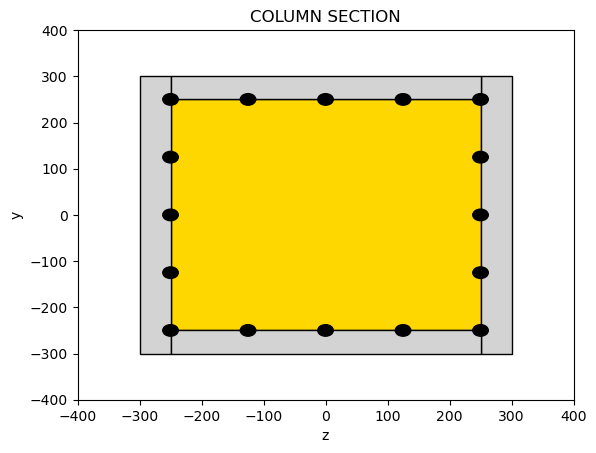

<Figure size 640x480 with 0 Axes>

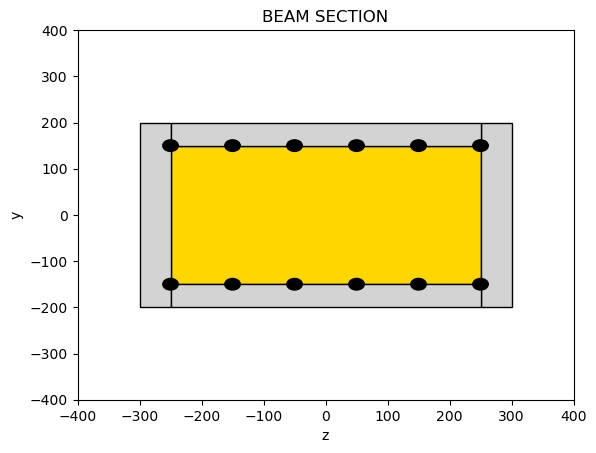

In [8]:
nFibCoverZ, nFibCoverY = 1 , 1
nFibCoreZ, nFibCoreY = 1, 1
FS01, FS02 = CONCRETE_SECTION_PLOT(600, 600, 600, 400, 50, 25,nFibCoverZ, nFibCoverY, nFibCoreZ, nFibCoreY, PLOT=1)

In [9]:
import openseespy.opensees as ops
import opsvis as opsv
import numpy as np
import matplotlib.pyplot as plt

# Initialize the model
ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)

# Define nonlinear beam-column elements for columns and beams
elements = [
    (1, 2), (2, 3), # Left column
    (4, 5), (5, 6), # Middle column
    (7, 8), (8, 9), # Right column
    (2, 5), (5, 8), # Bottom beam
    (3, 6), (6, 9)  # Top beam
]

# Define nodes
for i, coord in enumerate(node_coords):
    ops.node(i + 1, *coord)

# Fix base nodes
ops.fix(1, 1, 1, 1)
ops.fix(4, 1, 1, 1)
ops.fix(7, 1, 1, 1)

#ops.uniaxialMaterial('ReinforcingSteel', 1, fy_steel, fu_steel, E_steel, Esh, esh, eult)
# LINK: https://opensees.berkeley.edu/wiki/index.php?title=Reinforcing_Steel_Material

# Define fiber section for I-section
Bcol, Hcol, Bbeam, Hbeam = 600, 600, 600, 400; # [mm] Column & Beam Section Diamenstion Properties
COVER = 50        # [mm] Concrete Cover
REBAR_DIA = 25    # [mm] Steel Rebar Diameter

MAX_ITERAIONS = 5000
TOLERANCE = 1.0e-12

# Concrete Sections for Beams and Columns
nFibCoverZ, nFibCoverY, nFibCoreZ, nFibCoreY = 3, 120, 3, 120
SECTION01, SECTION02 = CONCRETE_SECTION_PLOT(Bcol, Hcol, Bbeam, Hbeam, COVER, REBAR_DIA,
                                             nFibCoverZ, nFibCoverY, nFibCoreZ, nFibCoreY, PLOT=0)
opsv.fib_sec_list_to_cmds(SECTION01) # COLUMNS
opsv.fib_sec_list_to_cmds(SECTION02) # BEAMS

UDL = -0.001   # [N/mm] Uniform Distributed Loads
PY = -12000    # [N] Verictal Constant Load in Node [5]

max_disp = -2500       # [mm] Maximum Vertical Displacement
Collapse_disp = -2500  # [mm] Absolute Value Collapse Vertical Displacement
disp_incr = -0.5       # [mm] Displacement Increment

# Define geometric transformation
# Linear:
# Small displacement assumptions in local to basic transformation
# Linear transformation of forces and displacements
# ops.geomTransf('Linear', 1)

# PDelta:
# Small displacement assumption transformation of displacements
# Account for transverse displacement of axial load in equilibrium relationship
# ops.geomTransf('PDelta', 1)

# Corotational:
# Fully nonlinear transformation of displacements and force
# Exact in 2D but some approximations in 3D
ops.geomTransf('Corotational', 1) 

for i, (iNode, jNode) in enumerate(elements):
    #                                 $eleTag $iNode $jNode $numIntgrPts $secTag $transfTag
    if i <= 5: # COLUMNS
        ops.element('nonlinearBeamColumn', i + 1, iNode, jNode, 5, 1, 1)
    else:      # BEAMS
        ops.element('nonlinearBeamColumn', i + 1, iNode, jNode, 5, 2, 1)
    

                
# Apply load pattern for pushover analysis on the middle column (node 5)
ops.timeSeries('Linear', 1)
ops.pattern('Plain', 1, 1)
#ops.load(2, 0.0, PY, 0.0)  # Vertical load
ops.load(5, 0.0, PY, 0.0)  # Vertical load
#ops.load(8, 0.0, PY, 0.0)  # Vertical load
# Uniform Distributed Load
for i in range(6, 10):
        # mag of uniformily distributed ref load acting in local y direction of element
        ops.eleLoad('-ele', i + 1,'-type', '-beamUniform', UDL, 0.0)
    
#ops.recorder('Collapse', '-ele', 4, '-node', 5, '-file', 'Collapse.txt')
# Define analysis parameters
ops.system('BandGeneral')
ops.numberer('RCM')
ops.constraints('Plain')
ops.test('EnergyIncr', TOLERANCE, MAX_ITERAIONS)
ops.algorithm('ModifiedNewton')
ops.integrator('DisplacementControl', 5, 2, disp_incr)
ops.analysis('Static')

print('Model Done.')

# Perform pushover analysis
n_steps = int(np.abs(max_disp / disp_incr)) # Analysis Steps
displacements = []
rotations = []
forcesH = []
forcesV = []
forcesM = []

# PLOT CURRENT TIME
CURRENT_TIME()
delete_element = False

for step in range(n_steps):
    #print(step + 1)
    ok = ops.analyze(1)
    ANALYSIS(ok, 1,TOLERANCE, MAX_ITERAIONS)
    #if test != 0:
    #    print('Structure in Unstable!')
    #    break;
    disp = ops.nodeDisp(5, 2) # VERTICAL DISPLACEMENT
    rotat = ops.nodeDisp(5, 3) # ROTATION
    ops.reactions()
    if abs(disp) < abs(Collapse_disp):
        forceH = ops.nodeReaction(1, 1) + ops.nodeReaction(5, 1) + ops.nodeReaction(9, 1) # SHEAR BASE REACTION
        forceV = ops.nodeReaction(1, 2) + ops.nodeReaction(5, 2) + ops.nodeReaction(9, 2) # AXIAL BASE REACTION
        forceM = ops.nodeReaction(1, 3) + ops.nodeReaction(5, 3) + ops.nodeReaction(9, 3) # MOMENT BASE REACTION
    if abs(disp) == abs(Collapse_disp) and not delete_element: 
        print(f"Displacement exceeds {Collapse_disp} mm. Removing element 5 at step {step + 1}.") 
        ops.remove('element', 3) # REMOVE ELEMENT
        ops.remove('sp', 4) # REMOVE FIX SUPPORT
        delete_element = True 
        forceH = ops.nodeReaction(1, 1) + ops.nodeReaction(5, 1) + ops.nodeReaction(9, 1) # SHEAR BASE REACTION
        forceV = ops.nodeReaction(1, 2) + ops.nodeReaction(5, 2) + ops.nodeReaction(9, 2) # AXIAL BASE REACTION
        forceM = ops.nodeReaction(1, 3) + ops.nodeReaction(5, 3) + ops.nodeReaction(9, 3) # MOMENT BASE REACTION
    if abs(disp) > abs(Collapse_disp):
        forceH = ops.nodeReaction(1, 1) + ops.nodeReaction(5, 1) + ops.nodeReaction(9, 1) # SHEAR BASE REACTION
        forceV = ops.nodeReaction(1, 2) + ops.nodeReaction(5, 2) + ops.nodeReaction(9, 2) # AXIAL BASE REACTION
        forceM = ops.nodeReaction(1, 3) + ops.nodeReaction(5, 3) + ops.nodeReaction(9, 3) # MOMENT BASE REACTION
        
    #force =  ops.eleResponse(1, 'force')[1] + ops.eleResponse(3, 'force')[1] + ops.eleResponse(5, 'force')[1]    
    #print(force)
    displacements.append(np.abs(disp)) # DISPLACEMENT NODE[5]
    rotations.append(rotat) # ROTAION NODE[5]
    forcesH.append(forceH)
    forcesV.append(forceV)
    forcesM.append(forceM)
    #print(step + 1, 'Pushover Done.')


#ops.wipe()

print('Analysis is Done.')
# PLOT CURRENT TIME
CURRENT_TIME()

Model Done.
Current time (HH:MM:SS): 00:01:26




after: 5000 iterations
 current EnergyIncr: 0.108287 (max: 1e-12) 	Norm deltaX: 0.00139969, Norm deltaR: 27533.2
ModifiedNewton::solveCurrentStep() -the ConvergenceTest object failed in test()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 3327.33
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0


WARNING - ForceBeamColumn2d::update - failed to get compatible element forces & deformations for element: 3(dW: << -2.0786e+06)
Domain::update - domain failed in update
DisplacementControl::update - model failed to update for new dU
WARNING AcceleratedNewton::solveCurrentStep() -the Integrator failed in update()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 2070.67
OpenSees > analyze failed, returned: -3 error flag
WARNING - ForceBeamColumn2d::update - failed to get compatible element forces & deformations for element: 3(dW: << 864684)
Domain::update - domain failed in update
DisplacementControl::update - model failed to update for new dU
WARNING AcceleratedNewton::solveCurrentStep() -the Integrator failed in update()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 2004.82
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton -3
NormDispIncr SecantNewton 0


WARNING - ForceBeamColumn2d::update - failed to get compatible element forces & deformations for element: 8(dW: << 1.03983e+06)
Domain::update - domain failed in update
DisplacementControl::update - model failed to update for new dU
WARNING AcceleratedNewton::solveCurrentStep() -the Integrator failed in update()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor -259.344
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0


WARNING - ForceBeamColumn2d::update - failed to get compatible element forces & deformations for element: 3(dW: << 46983.8)
Domain::update - domain failed in update
DisplacementControl::update - model failed to update for new dU
WARNING AcceleratedNewton::solveCurrentStep() -the Integrator failed in update()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 1287.49
OpenSees > analyze failed, returned: -3 error flag
WARNING - ForceBeamColumn2d::update - failed to get compatible element forces & deformations for element: 3(dW: << 111558)
Domain::update - domain failed in update
DisplacementControl::update - model failed to update for new dU
WARNING AcceleratedNewton::solveCurrentStep() -the Integrator failed in update()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 1287.47
OpenSees > analyze failed, returned: -3 error flag
WARNING - ForceBeamColumn2d::update - failed to get compatible element forces & deformati

NormDispIncr KrylovNewton -3
NormDispIncr SecantNewton -3
NormDispIncr RaphsonNewton -3
NormDispIncr PeriodicNewton 0


after: 5000 iterations  current Norm: 2.3209e-12 (max: 1e-12, Norm deltaR: 0.000193401)
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 1275.66
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0


WARNING - ForceBeamColumn2d::update - failed to get compatible element forces & deformations for element: 3(dW: << 1.05062)
Domain::update - domain failed in update
DisplacementControl::update - model failed to update for new dU
WARNING AcceleratedNewton::solveCurrentStep() -the Integrator failed in update()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 1204.97
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0


WARNING - ForceBeamColumn2d::update - failed to get compatible element forces & deformations for element: 3(dW: << -6.27931)
Domain::update - domain failed in update
DisplacementControl::update - model failed to update for new dU
WARNING AcceleratedNewton::solveCurrentStep() -the Integrator failed in update()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 1195.69
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
Displacement exceeds -2500 mm. Removing element 5 at step 5000.
Analysis is Done.
Current time (HH:MM:SS): 00:06:02




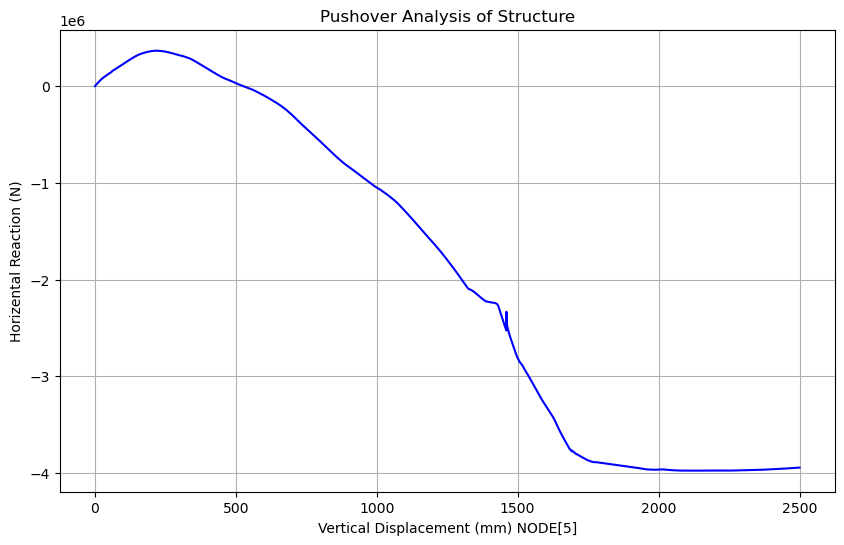

In [16]:
# Plot the Pushover urve
def PLOT_2D(X, Y, XLABEL, YLABEL, COLOR):
    plt.figure(figsize=(10, 6))
    plt.plot(X, Y,  color=COLOR)
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    plt.title('Pushover Analysis of Structure')
    plt.grid(True)
    #plt.semilogy()
    plt.show()
    
X = displacements 
Y = forcesH
XLABEL = 'Vertical Displacement (mm) NODE[5]'
YLABEL = 'Horizental Reaction (N)'
COLOR = 'blue'
PLOT_2D(X, Y, XLABEL, YLABEL, COLOR)  

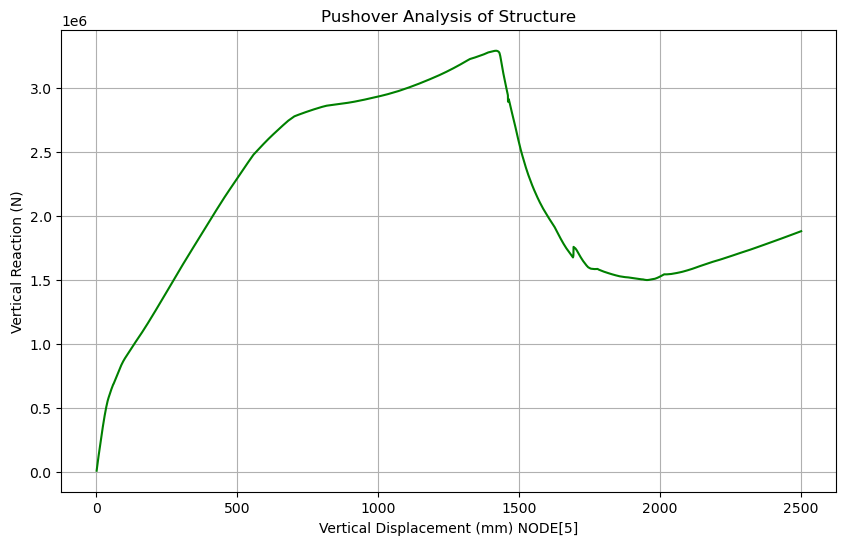

In [17]:
X = displacements 
Y = forcesV
XLABEL = 'Vertical Displacement (mm) NODE[5]'
YLABEL = 'Vertical Reaction (N)'
COLOR = 'green'
PLOT_2D(X, Y, XLABEL, YLABEL, COLOR)  

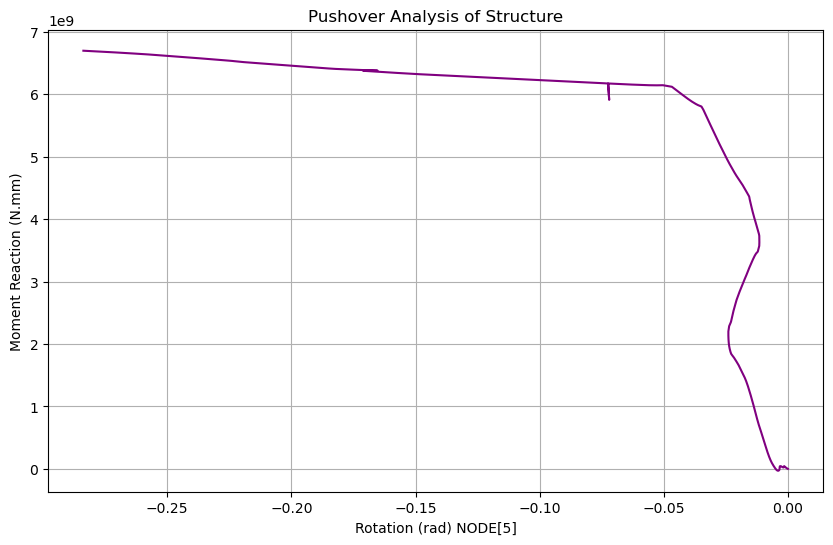

In [18]:
X = rotations 
Y = forcesM
XLABEL = 'Rotation (rad) NODE[5]'
YLABEL = 'Moment Reaction (N.mm)'
COLOR = 'purple'
PLOT_2D(X, Y, XLABEL, YLABEL, COLOR)

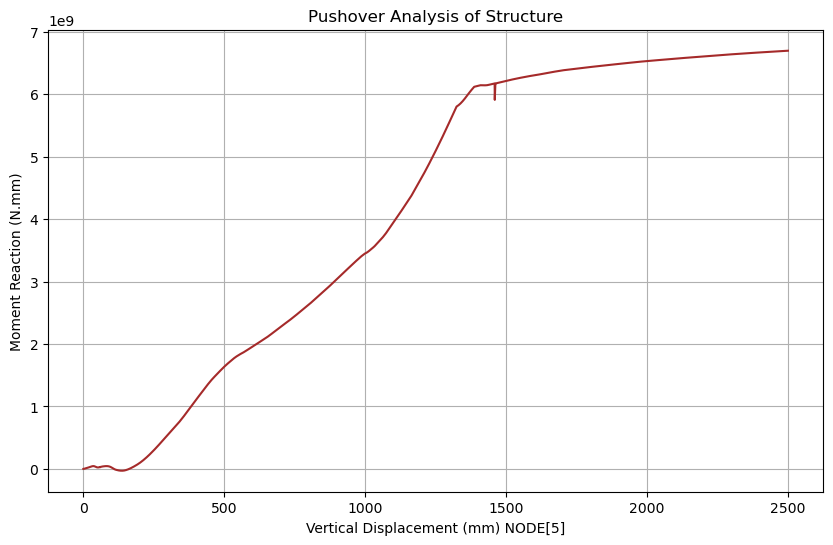

In [19]:
X = displacements 
Y = forcesM
XLABEL = 'Vertical Displacement (mm) NODE[5]'
YLABEL = 'Moment Reaction (N.mm)'
COLOR = 'brown'
PLOT_2D(X, Y, XLABEL, YLABEL, COLOR)

In [14]:
# Define a function to plot the frame shapes
def PLOT_2D_FRAME(deformed_scale=1.0):
    import openseespy.opensees as ops
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, figsize=(20, 16))

    # Extract node coordinates
    nodes = ops.getNodeTags()
    node_coords = {node: ops.nodeCoord(node) for node in nodes}

    # Plot undeformed shape
    for ele in ops.getEleTags():
        node1, node2 = ops.eleNodes(ele)
        x1, y1 = node_coords[node1]
        x2, y2 = node_coords[node2]
        ax.plot([x1, x2], [y1, y2], 'k-', label='Undeformed' if ele == 1 else "")  # Black line for undeformed

    # Plot deformed shape
    for ele in ops.getEleTags():
        node1, node2 = ops.eleNodes(ele)
        x1, y1 = node_coords[node1]
        x2, y2 = node_coords[node2]

        ux1, uy1, _ = ops.nodeDisp(node1)  # Displacement at node1
        ux2, uy2, _ = ops.nodeDisp(node2)  # Displacement at node2

        ax.plot([x1 + deformed_scale * ux1, x2 + deformed_scale * ux2],
                [y1 + deformed_scale * uy1, y2 + deformed_scale * uy2],
                'r--', label='Deformed' if ele == 1 else "")  # Red dashed line for deformed
                
    # Annotate nodes with their tags
    for node, (x, y) in node_coords.items():
        ux, uy, _ = ops.nodeDisp(node)  # Displacement at node
        ax.text(x, y, f"{node}", color='blue', fontsize=12, ha='center', label='Node Tags' if node == 1 else "")  # Undeformed
        ax.text(x + deformed_scale * ux, y + deformed_scale * uy, f"{node}", color='purple', fontsize=12, ha='center')  # Deformed            

    #ax.set_aspect('equal', 'box')
    ax.set_xlabel('X [mm]')
    ax.set_ylabel('Z [mm]')
    ax.set_title(f'Undeformed and Deformed Shapes - DEFORMED SCALE: {deformed_scale:.2f}')
    ax.legend()
    ax.grid()
    plt.show()
    


C:\Users\Dell\AppData\Local\Temp\ipykernel_5252\2505640900.py:43: UserWarning: Legend does not support handles for Text instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


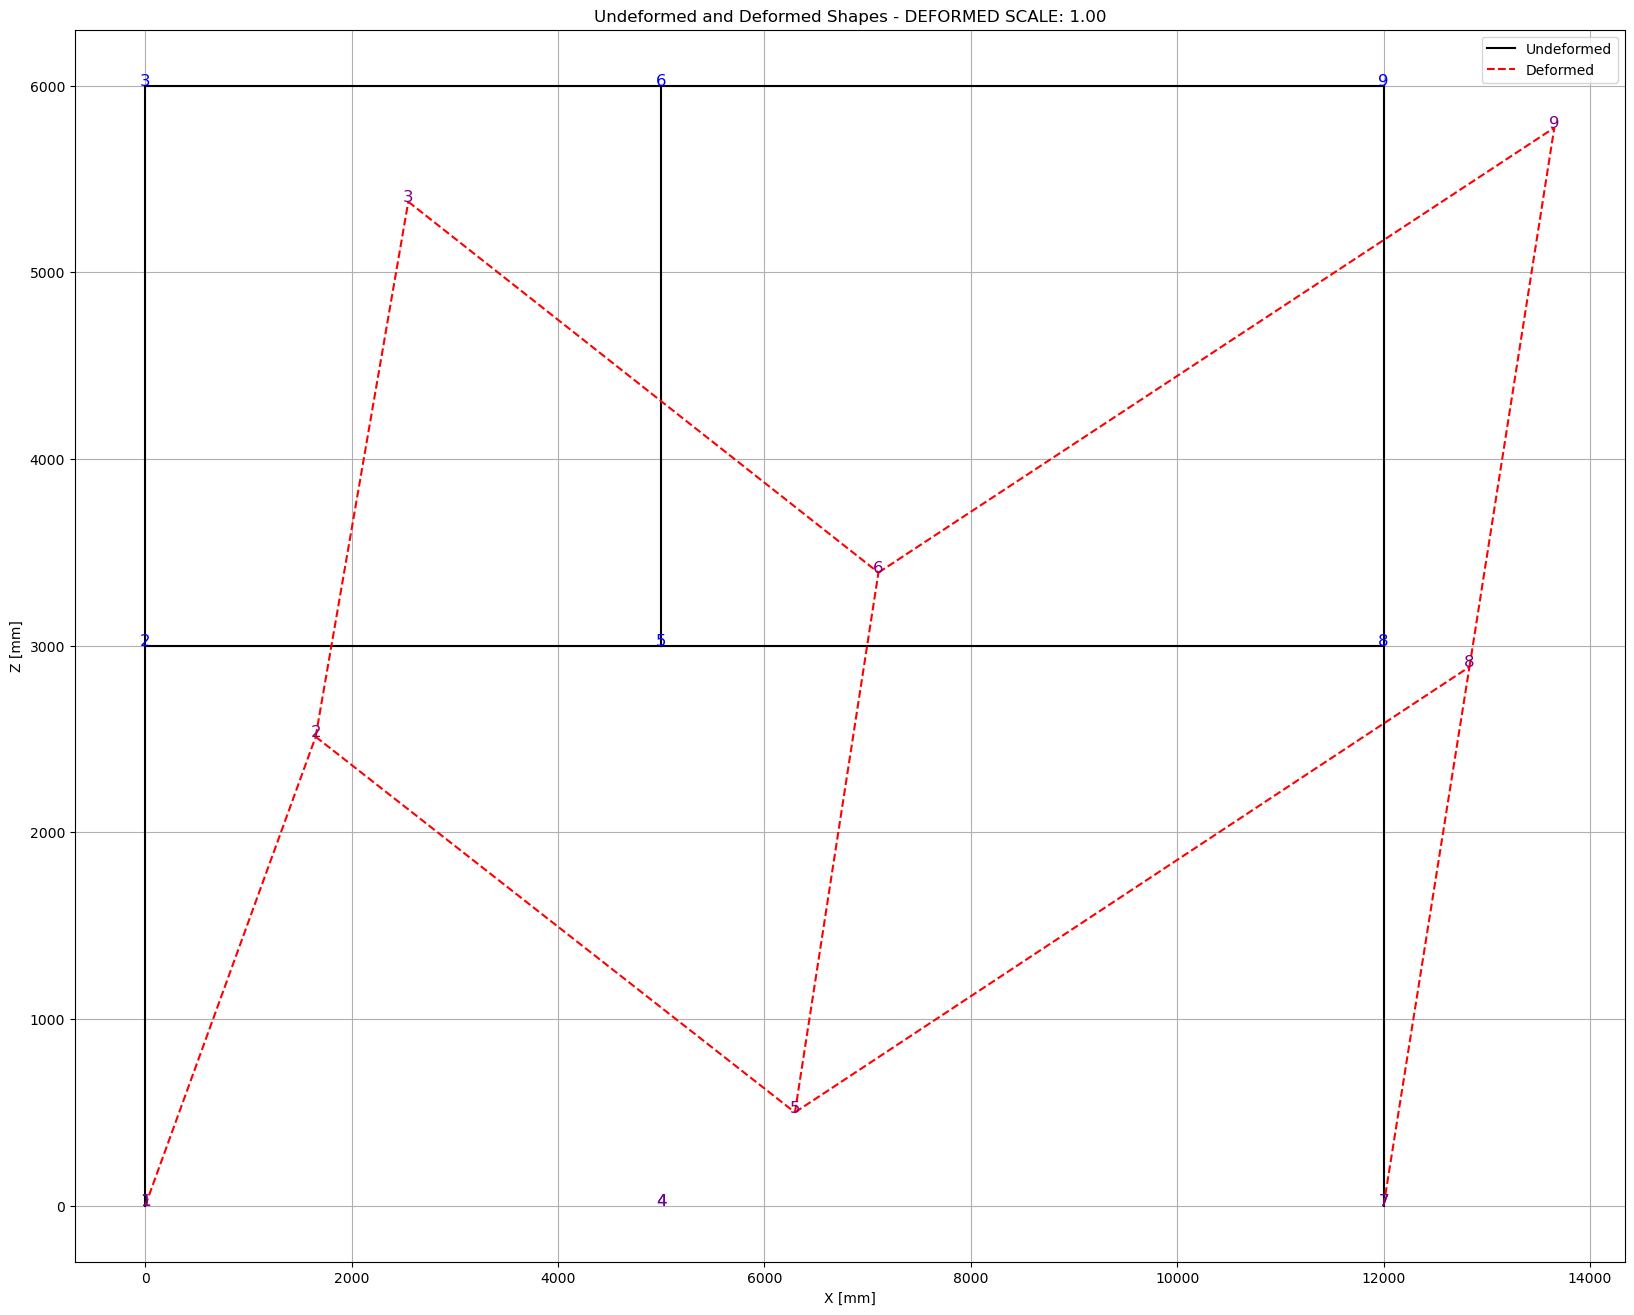

In [15]:
# %% Plot 2D Frame Shapes
PLOT_2D_FRAME(deformed_scale=1)  # Adjust scale factor as needed